# Data Cleaning
city names source: https://simplemaps.com/data/us-cities

In [150]:
import os
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
import glob
import string
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [129]:
names = pd.read_csv("./Data/names.csv", encoding = "ISO-8859-1")
locations = pd.read_csv("./Data/uscities.csv")
articles = pd.read_csv("./headlines/NYTData.csv")
countries = pd.read_csv("./Data/countries.csv")

In [130]:
print(len(articles))
articles.head()


25528


,headline,date,doc_type,material_type,section,keywords
0,New York and New Jersey join a growing list of...,2020-10-01,article,News,NaN,[]
1,Tech Isn’t the Answer for Test Taking,2020-10-02,article,News,NaN,"['Computers and the Internet', 'Social Media',..."
2,Quotation of the Day: When Your Job Is to Ensu...,2020-10-02,article,Quote,NaN,[]
3,Considering a Coronavirus Divorce? You’re in G...,2020-10-01,article,Op-Ed,NaN,"['Families and Family Life', 'Coronavirus (201..."
4,How Julie Taymor Brings Visual Flair to ‘The G...,2020-10-02,article,News,NaN,['Movies']


In [131]:
# Taking only news articles
articles = articles[articles["material_type"] == "News"]

# Formatting locations and creating a locationSet
locationSet = {"United States"}
# countries = countries.drop(columns=["Code"])
for country in countries.Name.values:
    if len(country.split()) > 1:
        locationSet.add(country.lower()) 
for location in locations.city.values:
    if len(location.split()) > 1:
        locationSet.add(location.lower()) 
for location in locations.state_name.values:
    if len(location.split()) > 1:
        locationSet.add(location.lower()) 

In [132]:
articles = articles.drop(columns=["doc_type", "material_type", "section", "keywords"])
articles = articles.dropna()
names = names.drop(columns=["A"])
names = names.rename(columns = {"Adele":"names"})


In [134]:
# How to check is a word is in the dataframe
# 'Adele' in names.names.values
names.head()
articles

,headline,date
0,New York and New Jersey join a growing list of...,2020-10-01
1,Tech Isn’t the Answer for Test Taking,2020-10-02
4,How Julie Taymor Brings Visual Flair to ‘The G...,2020-10-02
5,Are Underhand Serves Underhanded? Tennis Is Op...,2020-10-02
6,Two New Movies Share a Clear Message: Don’t Fo...,2020-10-02
...,...,...
25507,Quotation of the Day: States Aren’t Ready to D...,2020-11-15
25508,Recipes to Alter Your Mood,2020-11-16
25510,"Trump Administration, in Late Push, Moves to S...",2020-11-16
25511,‘It Was Hard Not to Eavesdrop on the Two Men a...,2020-11-15


In [135]:
#Removing punctuation from headlines
for i in range(len(articles)):
    text = articles.iloc[i][0].translate(str.maketrans('', '', string.punctuation)).lower()
    articles.iloc[i][0] = text

In [136]:
#Group by every day
articles = articles.groupby(["date"]).agg(lambda s: " ".join(s))

In [137]:
#Formatting names
i = 0
nameSet = {"TESTSTRING"}
nameSet.remove("TESTSTRING")
for name in names.names.values:
    names["names"][i] = name.lower()
    i += 1
    nameSet.add(name)

In [112]:
#Testing below
# d = {'col1': [1, 2], 'headline': ["hi hi hi hi hi hi", "potato potato potato hi hi hi hi"]}
# testdf = pd.DataFrame(data=d)
# for i in range(len(testdf)):
#     s = {}
#     for name in nameSet:
#         if name in testdf["headline"][i]:
#             if name in s:
#                 s[name] += 1
#             else:
#                 s[name] = 1
#             testdf["headline"][i].replace(name, "")
#     for name in locationSet:
#         if name in testdf["headline"][i]:
#             if name in s:
#                 s[name] += 1
#             else:
#                 s[name] = 1
#             testdf["headline"][i].replace(name, "")
#     for word in testdf["headline"][i].split():
#         if word in s:
#             s[word] += 1
#         else:
#             s[word] = 1
#     testdf["headline"][i] = s

In [149]:
#Removing duplicate words from headlines and counting them
for i in range(len(articles)):
    s = {}
    for name in nameSet:
        if name in articles["headline"][i]:
            if name in s:
                s[name] += 1
            else:
                s[name] = 1
            articles["headline"][i].replace(name, "")
    for name in locationSet:
        if name in articles["headline"][i]:
            if name in s:
                s[name] += 1
            else:
                s[name] = 1
            articles["headline"][i].replace(name, "")
    for word in articles["headline"][i].split():
        word = word.replace("‘", "")
        word = word.replace("’", "")
        if word in s:
            s[word] += 1
        else:
            s[word] = 1
    articles["headline"][i] = s
articles.to_csv("./data/NYTDataCleaned.csv")

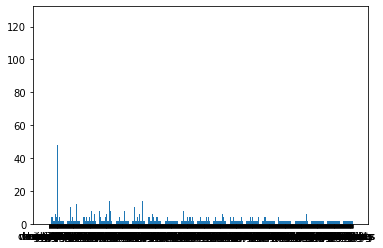

In [160]:
D = articles.iloc[0]["headline"]
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()